In [93]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Checking out the data 

In [95]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [97]:
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Checking the correlation between the features

In [98]:

df['speciesInNumber'] = df['species'].map({
    'setosa':1,
    'versicolor':2,
    'virginica':3
})

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,speciesInNumber
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [99]:
df = df.drop('species', axis=1)
corr = df.corr()
corr["speciesInNumber"].sort_values(ascending=0)

speciesInNumber    1.000000
petal_width        0.956547
petal_length       0.949035
sepal_length       0.782561
sepal_width       -0.426658
Name: speciesInNumber, dtype: float64

In [100]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


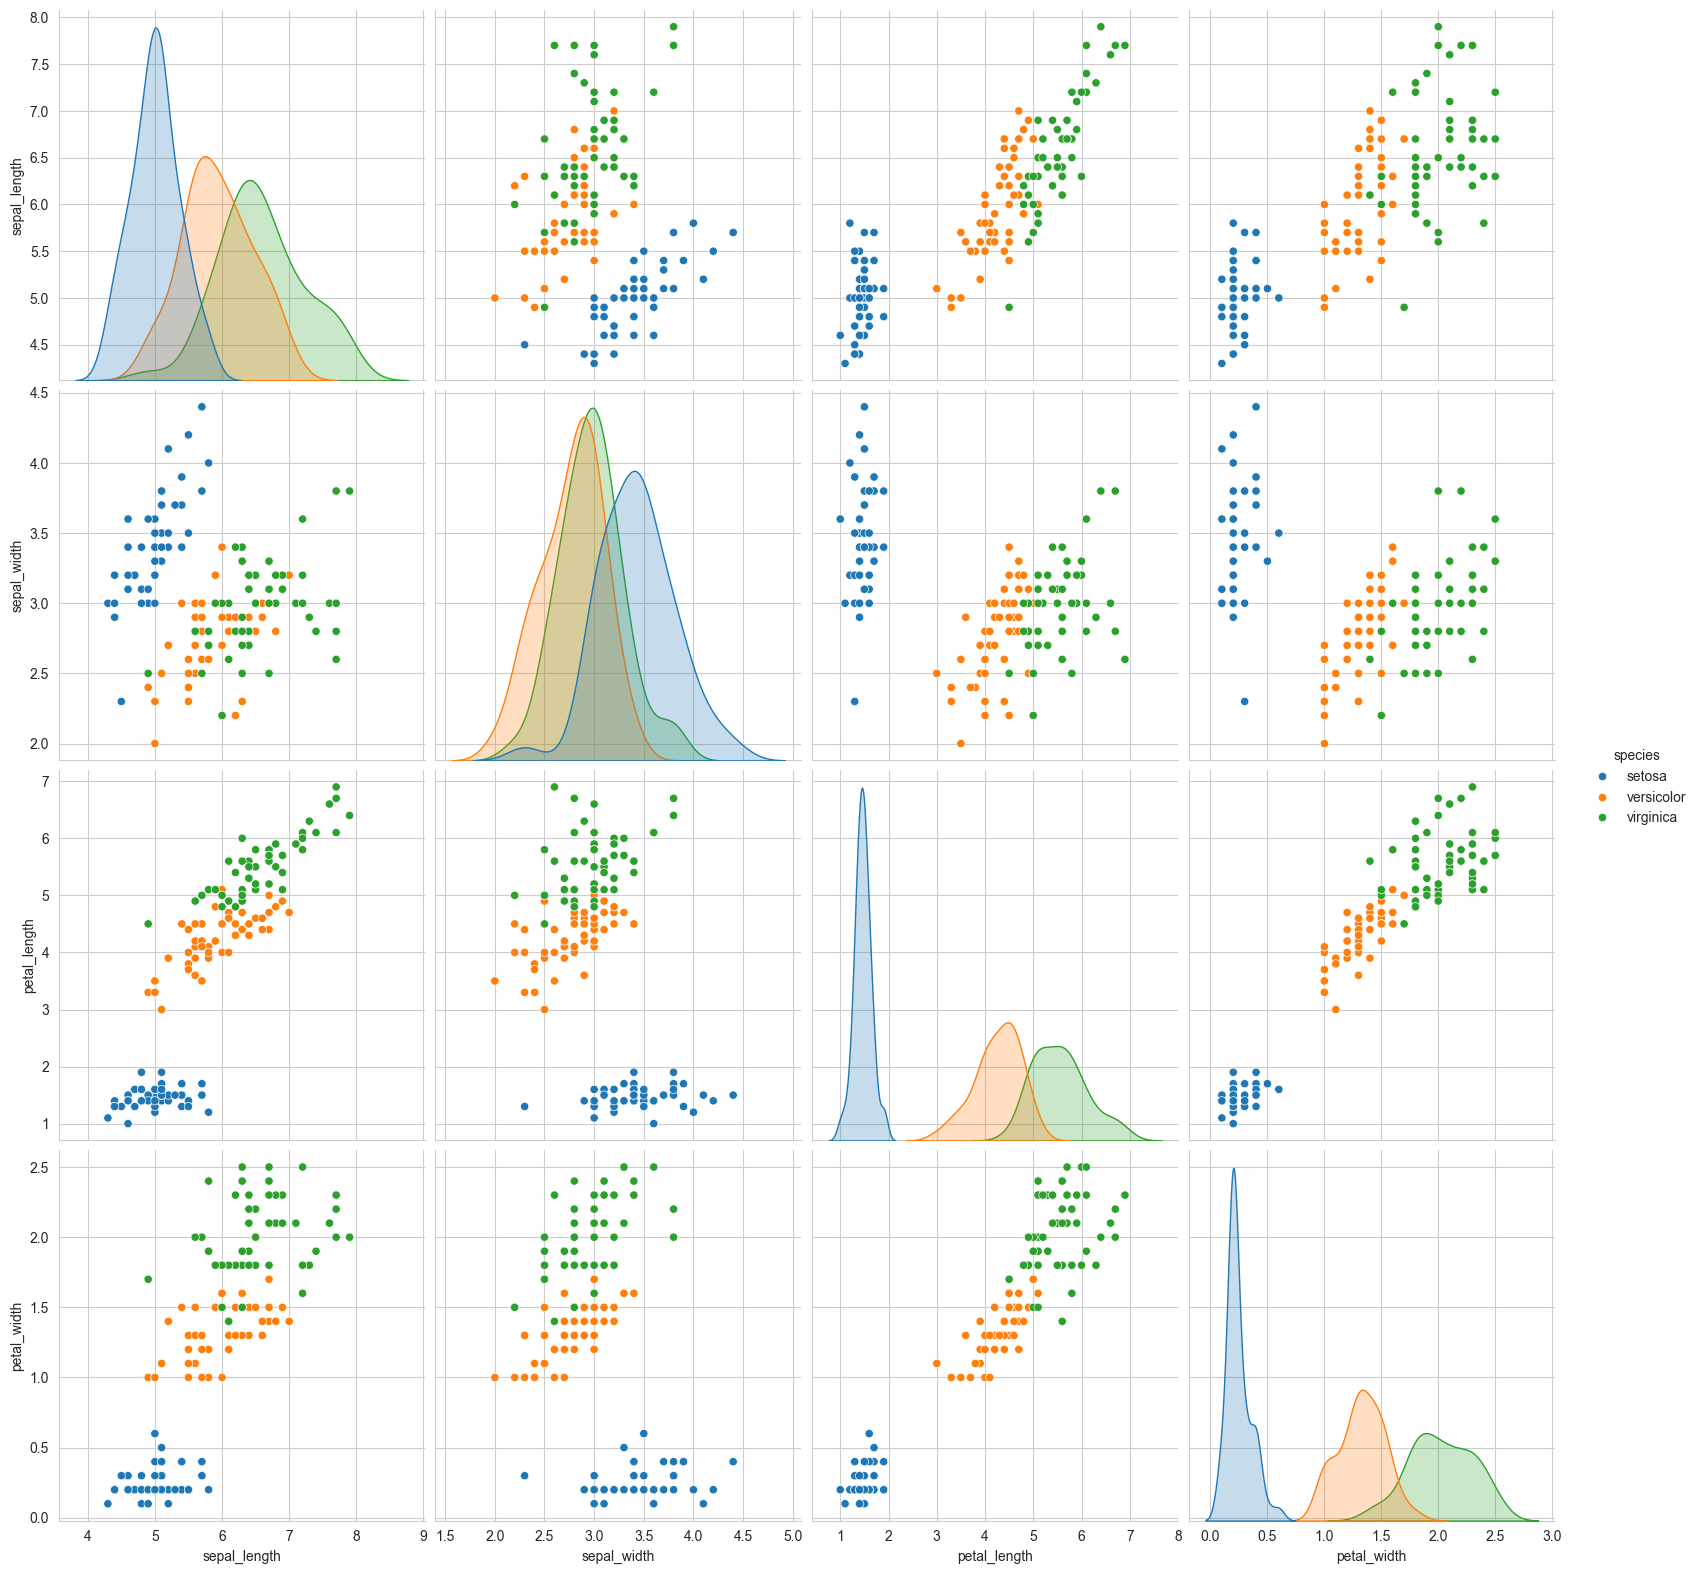

In [101]:
sns.pairplot(df, hue='species', size=4)
plt.show()

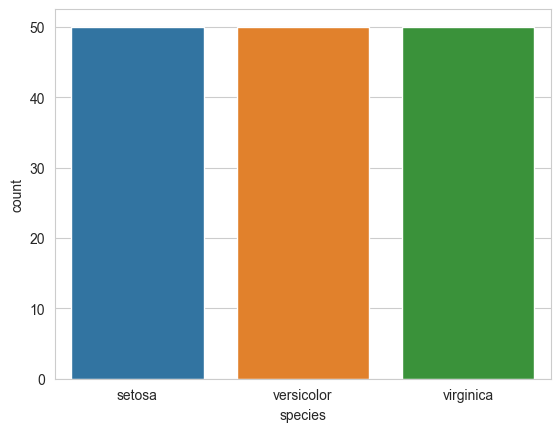

In [102]:
sns.countplot(df, x = 'species', hue='species')
plt.show()

By the count plot we can see the survival of more than 5 year is more than survival of less than 5 year .

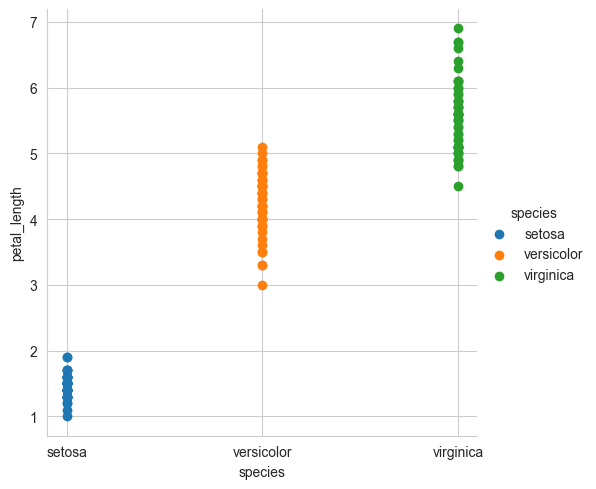

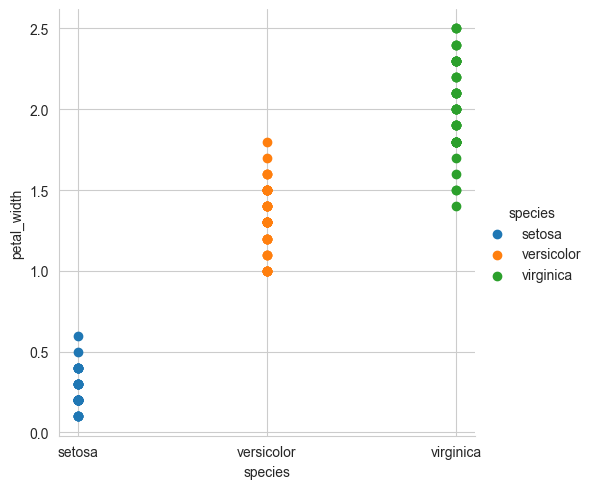

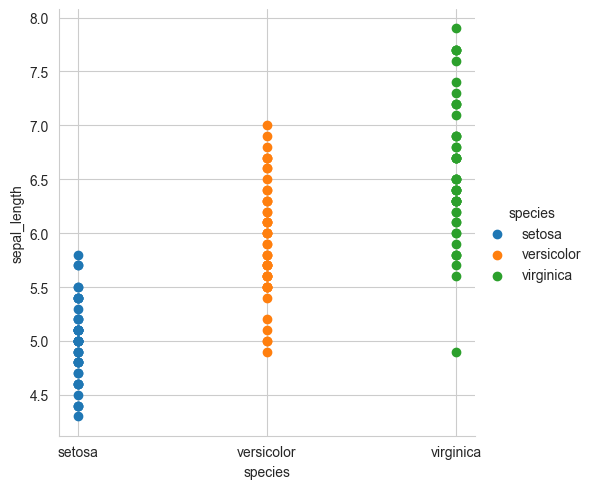

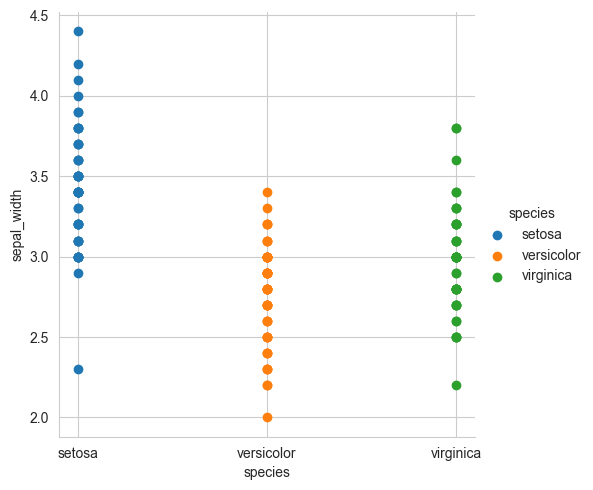

In [103]:
def face(feature):
    sns.set_style("whitegrid")
    sns.FacetGrid(df, hue="species", height=5)\
    .map(plt.scatter, "species", feature)\
    .add_legend()
    plt.show()

face("petal_length")
face('petal_width')
face('sepal_length')
face('sepal_width')

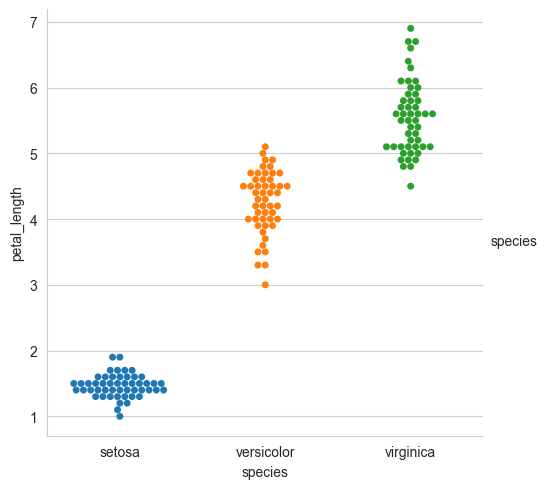

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


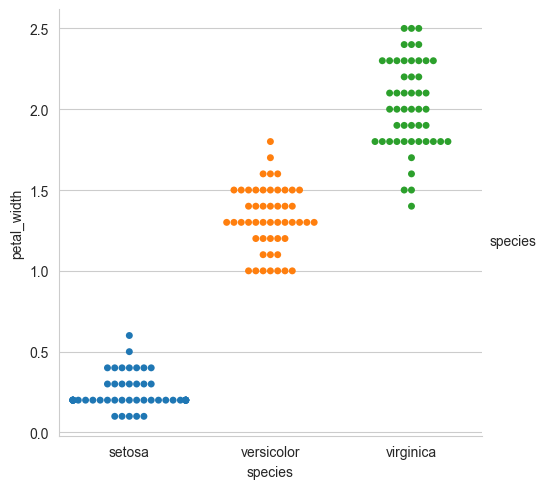

In [104]:
def cat(feature):
    sns.catplot(df , x = "species" , y = feature ,  kind  = "swarm", hue='species')
    plt.show()

cat('petal_length')
cat('petal_width')

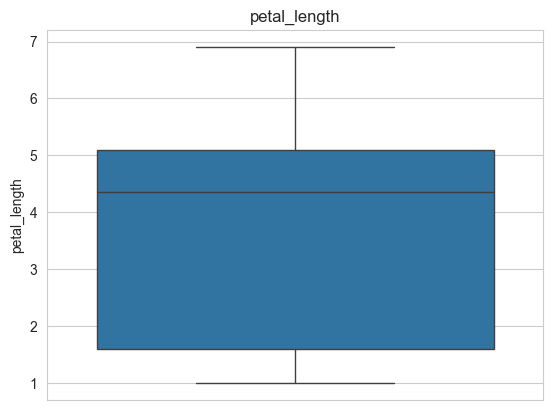

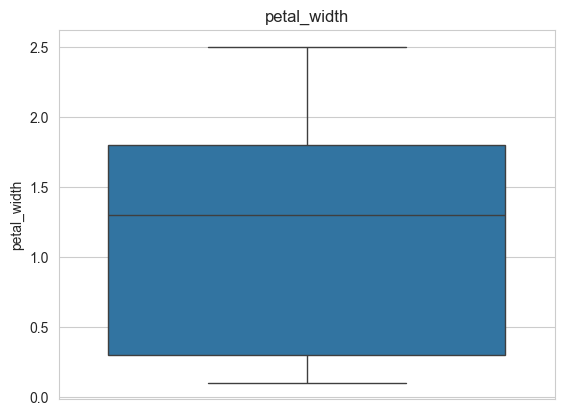

In [105]:
def box(feature):
    sns.boxplot(df, y=feature)
    plt.title(feature)
    plt.show()

box('petal_length')
box('petal_width')

In [106]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [107]:
X = df.iloc[:, :4]
y = df.iloc[:, 4]
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0         setosa
 1         setosa
 2         setosa
 3         setosa
 4         setosa
          ...    
 145    virginica
 146    virginica
 147    virginica
 148    virginica
 149    virginica
 Name: species, Length: 150, dtype: object)

In [108]:
X.shape, y.shape

((150, 4), (150,))

In [109]:
X_train, X_test, y_train, y_test  = train_test_split(X, y  , test_size = 0.25 , random_state  = 45)

<p>KNN</p>

In [110]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2)

In [111]:
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [112]:
y_prediction = knn.predict(X_test)
y_prediction

array(['setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'virginica', 'virginica', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'setosa'], dtype=object)

<p>Model Evaluation</p>

In [113]:
import numpy as np
z = np.vstack((y_prediction, y_test))
pd.DataFrame(z)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,setosa,setosa,virginica,setosa,setosa,setosa,setosa,virginica,virginica,virginica,...,setosa,versicolor,versicolor,versicolor,versicolor,virginica,setosa,virginica,setosa,setosa
1,setosa,setosa,virginica,setosa,setosa,setosa,setosa,virginica,virginica,virginica,...,setosa,versicolor,versicolor,versicolor,virginica,virginica,setosa,virginica,setosa,setosa


In [114]:
accuracy_score(y_prediction, y_test)

0.9473684210526315

<p>Naive bayes</p>

In [115]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()

In [116]:
naive_model.fit(X_train, y_train)

GaussianNB()

In [117]:
y_pred = naive_model.predict(X_test)

In [118]:
pd.DataFrame(np.vstack((y_pred, y_test)))

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,setosa,setosa,virginica,setosa,setosa,setosa,setosa,virginica,virginica,virginica,...,setosa,versicolor,versicolor,versicolor,versicolor,virginica,setosa,virginica,setosa,setosa
1,setosa,setosa,virginica,setosa,setosa,setosa,setosa,virginica,virginica,virginica,...,setosa,versicolor,versicolor,versicolor,virginica,virginica,setosa,virginica,setosa,setosa


In [119]:
accuracy_score(y_pred, y_test)

0.9473684210526315

## Decision Tree

In [120]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [121]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [122]:
y_pred = tree.predict(X_test)

In [123]:
pd.DataFrame(np.vstack((y_pred, y_test)))

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,setosa,setosa,virginica,setosa,setosa,setosa,setosa,virginica,virginica,virginica,...,setosa,versicolor,versicolor,versicolor,versicolor,virginica,setosa,virginica,setosa,setosa
1,setosa,setosa,virginica,setosa,setosa,setosa,setosa,virginica,virginica,virginica,...,setosa,versicolor,versicolor,versicolor,virginica,virginica,setosa,virginica,setosa,setosa


In [124]:
accuracy_score(y_pred, y_test)

0.9473684210526315

## Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [126]:
forest.fit(X_train, y_train)

RandomForestClassifier()

In [127]:
y_pred = forest.predict(X_test)

pd.DataFrame(np.vstack((y_pred, y_test)))

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,setosa,setosa,virginica,setosa,setosa,setosa,setosa,virginica,virginica,virginica,...,setosa,versicolor,versicolor,versicolor,versicolor,virginica,setosa,virginica,setosa,setosa
1,setosa,setosa,virginica,setosa,setosa,setosa,setosa,virginica,virginica,virginica,...,setosa,versicolor,versicolor,versicolor,virginica,virginica,setosa,virginica,setosa,setosa


In [128]:
accuracy_score(y_pred, y_test)

0.9473684210526315